In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/refs/heads/main/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# How many rows (video games) and columns (features) are present in the dataset?
print("Number of (features) are present in the dataset:",df.shape)

Number of (features) are present in the dataset: (16598, 11)


In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df['Year']=df['Year'].astype('Int64')
df.dtypes

Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
# Which columns are categorical and which are numerical in the dataset?

categorical_cols=df.select_dtypes(include=['object','category']).columns
numerical_cols=df.select_dtypes(include=['number']).columns
print("Categorical Columns:",categorical_cols)
print("Numerical Columns:",numerical_cols)

Categorical Columns: Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')
Numerical Columns: Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


In [8]:
# Are there any columns that look like identifiers (e.g., 'Name') that may not be useful for prediction? If so, which ones?
df.select_dtypes(include=['object','category']).columns

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')

In [9]:
df=df.drop(columns=['Name'])

In [10]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
# Are there are any missing values in the dataset? 
df.isnull().sum().sort_values(ascending=False)

Year            271
Publisher        58
Platform          0
Rank              0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
df['Year'].skew() # Find the skewness of the 'Year' column to understand its distribution.
# Skewness range:
# if this value is between -0.5 and 0.5, the distribution is approximately symmetric.
# if this value is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# if this value is less than -1 or greater than 1, the distribution is highly skewed.

np.float64(-1.002560494621347)

In [13]:
df['Year'].fillna(df['Year'].median(),inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

Publisher       58
Rank             0
Platform         0
Year             0
Genre            0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [15]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

In [17]:
df.isnull().sum().sort_values(ascending=False)

Rank            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [18]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
df['Publisher'].nunique()

578

In [20]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Revolution (Japan)                 1
Saurus                             1
Palcom                             1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [21]:
df['Publisher'].fillna('Unknown',inplace=True)
df.isnull().sum().sort_values(ascending=False)

Rank            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [22]:
# Are there are any duplicates records in the datasets
df.duplicated().sum()

np.int64(0)

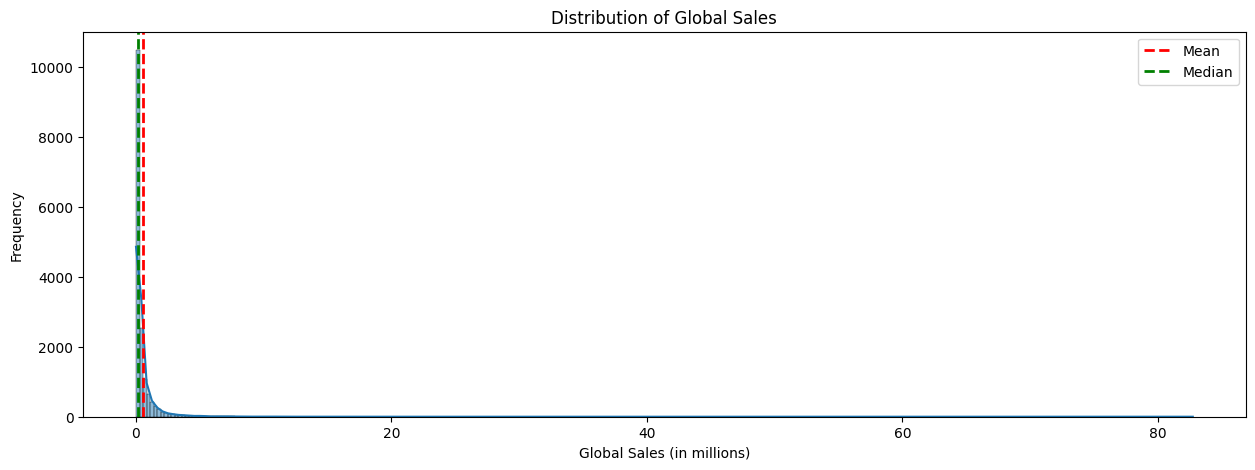

In [23]:
# What is the distribution of global sales
plt.figure(figsize=(15,5))
sns.histplot(df['Global_Sales'],bins=300,kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Frequency")
plt.axvline(df['Global_Sales'].mean(),color='red',linestyle='--',linewidth=2,label='Mean')
plt.axvline(df['Global_Sales'].median(),color='green',linestyle='--',linewidth=2,label='Median')
plt.legend()
plt.show()

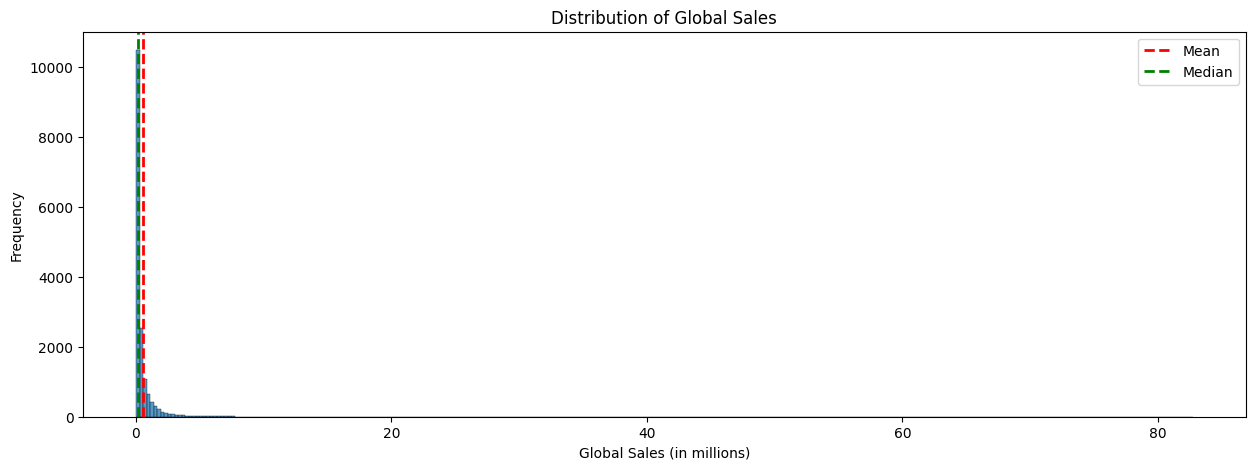

In [24]:
# What is the distribution of global sales
plt.figure(figsize=(15,5))
sns.histplot(df['Global_Sales'],bins=300)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Frequency")
plt.axvline(df['Global_Sales'].mean(),color='red',linestyle='--',linewidth=2,label='Mean')
plt.axvline(df['Global_Sales'].median(),color='green',linestyle='--',linewidth=2,label='Median')
plt.legend()
plt.show()

In [25]:
# what are the minimum ,maximum,mean and median global sales
min_sales=df['Global_Sales'].min()
max_sales=df['Global_Sales'].max()
mean_sales=df['Global_Sales'].mean()
median_sales=df['Global_Sales'].median()
print("Minimum Global Sales:",min_sales)
print("Maximum Global Sales:",max_sales)
print("Mean Global Sales:",mean_sales)
print("Median Global Sales:",median_sales)

Minimum Global Sales: 0.01
Maximum Global Sales: 82.74
Mean Global Sales: 0.5374406555006629
Median Global Sales: 0.17


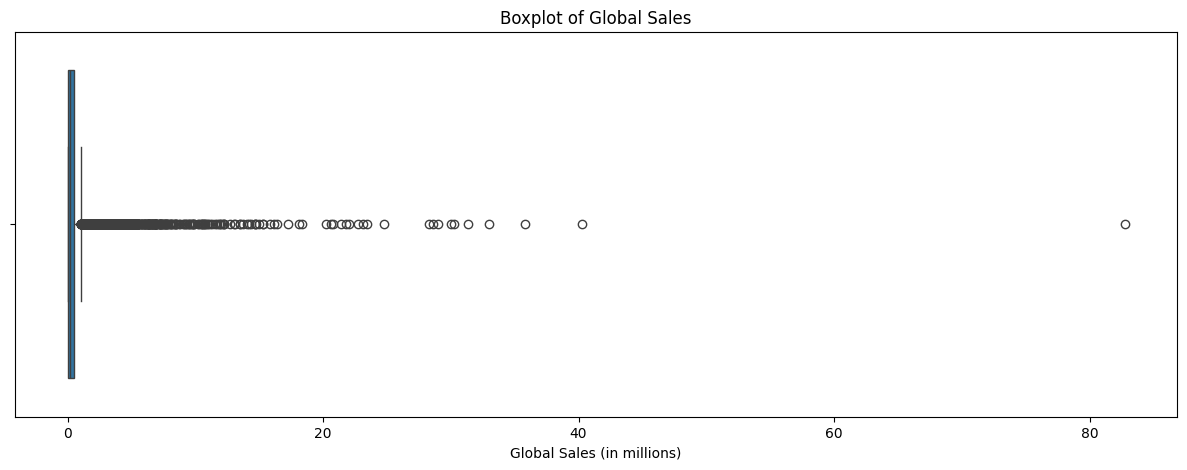

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['Global_Sales'])
plt.title("Boxplot of Global Sales")
plt.xlabel("Global Sales (in millions)")
plt.show()

In [27]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


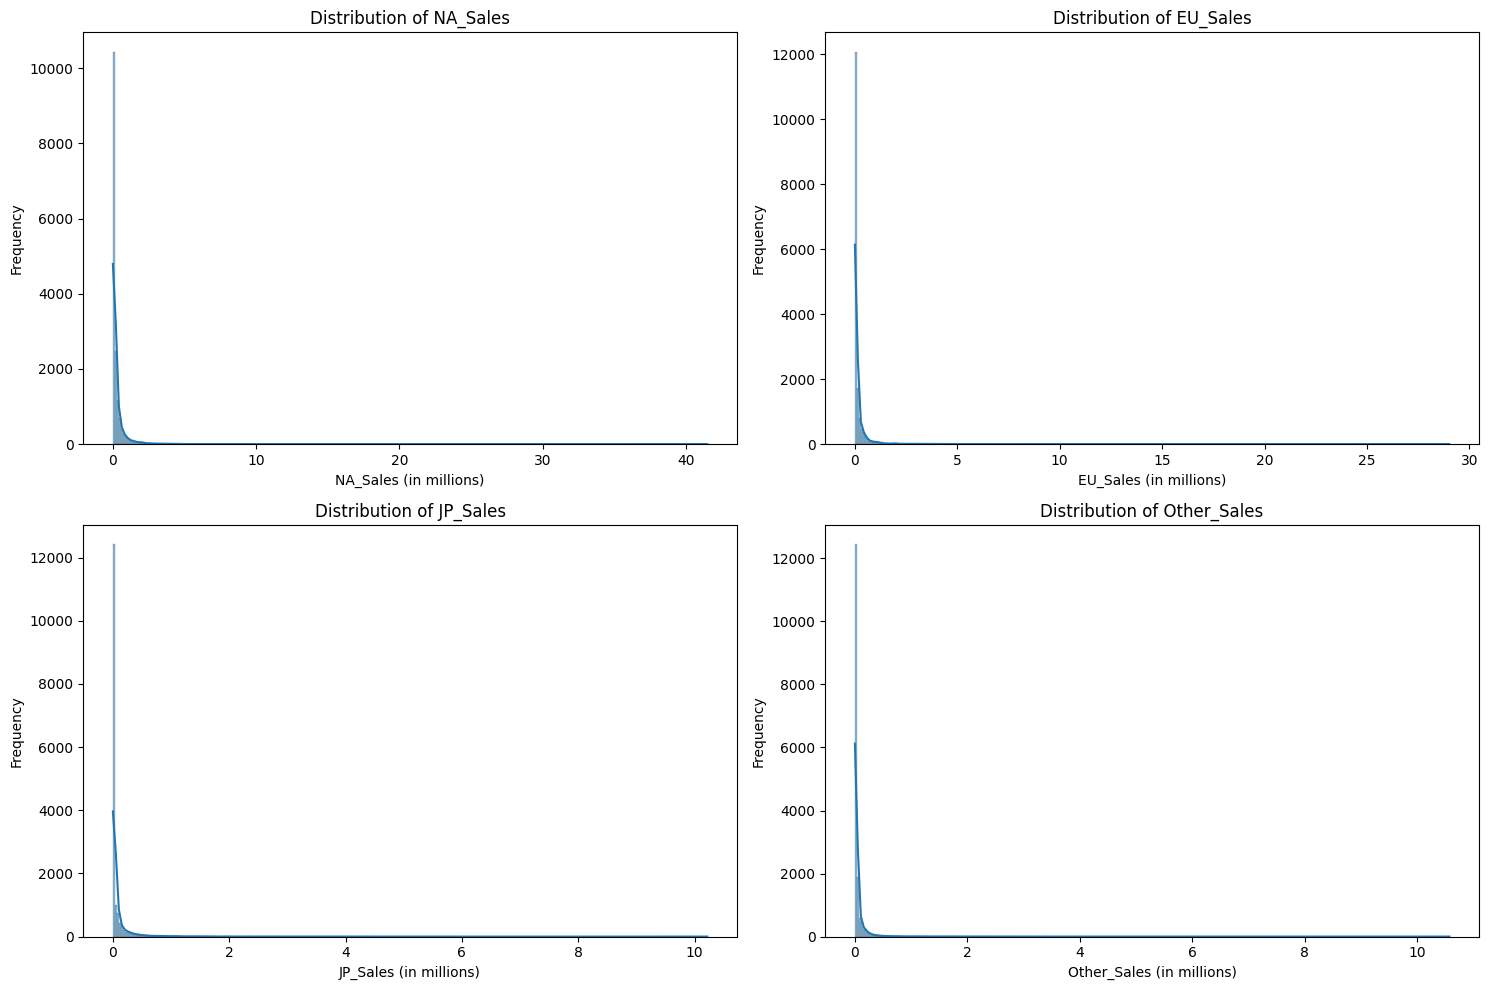

In [28]:
# how do regional sales (NA_Sales, EU_Sales, JP_Sales, Other_Sales) contribute to global sales (Global_Sales)? Are there any patterns or correlations between these features?
plt.figure(figsize=(15,10))
regions=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i,region in enumerate(regions,1):
    plt.subplot(2,2,i)
    sns.histplot(df[region],bins=300,kde=True)
    plt.title(f"Distribution of {region}")
    plt.xlabel(f"{region} (in millions)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [29]:
# Which region contribute the most to overall sales on average?
average_sales_by_region=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
average_sales_by_region

NA_Sales       0.264667
EU_Sales       0.146652
JP_Sales       0.077782
Other_Sales    0.048063
dtype: float64

In [30]:
# How many unique platform are present in the datasets?
unique_platforms=df['Platform'].nunique()
unique_platforms

31

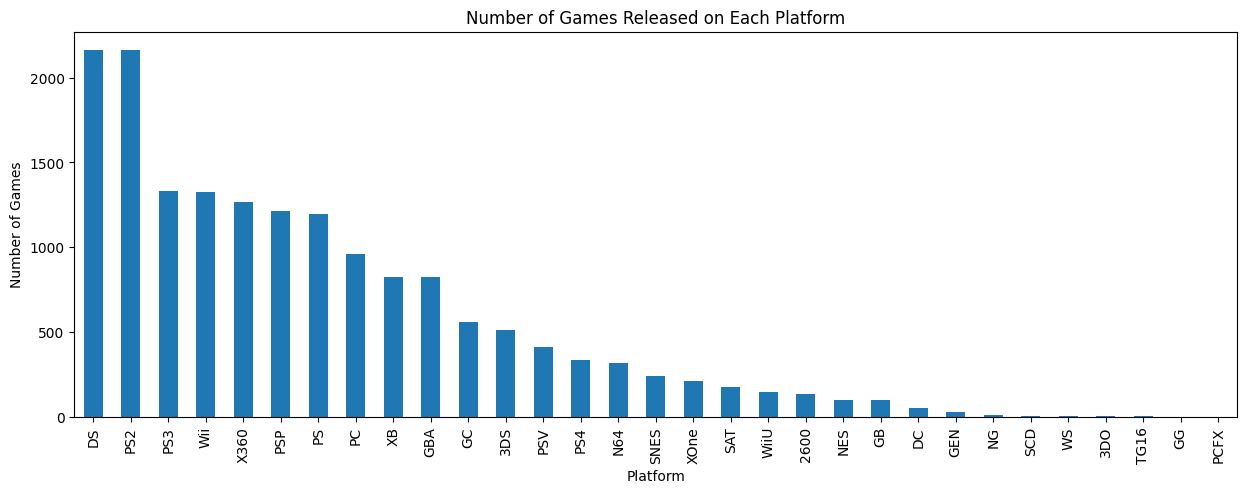

In [31]:
# which platform has the highest average global sales?
platform_game_counts=df['Platform'].value_counts()
platform_game_counts.plot(kind='bar',figsize=(15,5))
plt.title("Number of Games Released on Each Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.show()

In [32]:
unique_genres=df['Genre'].nunique()
unique_genres

12

In [33]:
df['Genre'].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [34]:
# which genre appears most frequently in the dataset?
most_frequent_genre=df['Genre'].value_counts().idxmax()
most_frequent_genre

'Action'

In [35]:
# How many unique publishers are present?
unique_publishers=df['Publisher'].nunique()
unique_publishers

578

In [36]:
# Are there a few dominant publishers controlling most releases
dominant_publishers=df['Publisher'].value_counts().head(10)
dominant_publishers

Publisher
Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

In [37]:
df['Year'].value_counts()

Year
2007    1473
2009    1431
2008    1428
2010    1259
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: Int64

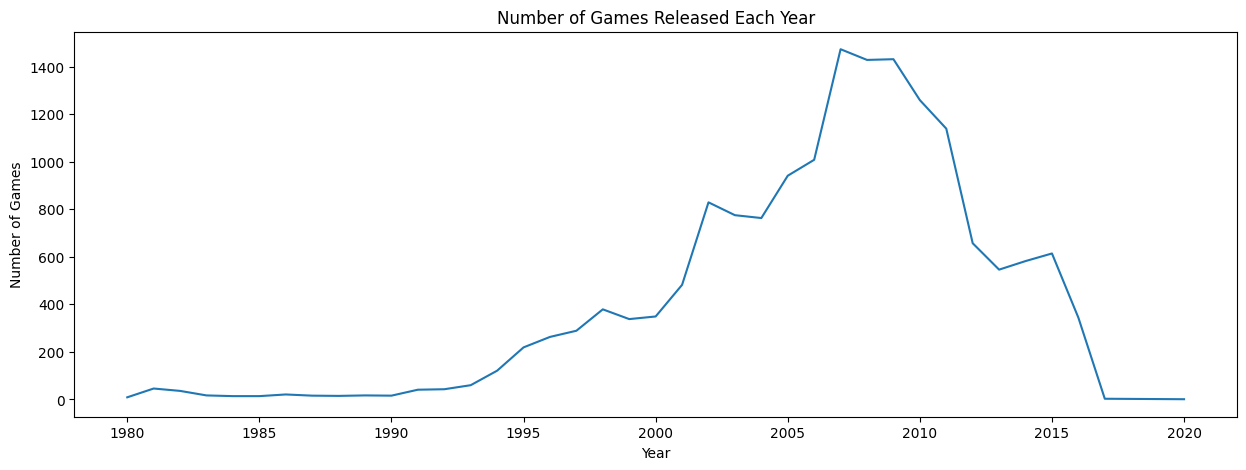

In [38]:
# How many games were relaeased each year?
games_released_per_year=df['Year'].value_counts().sort_index()
games_released_per_year.plot(kind='line',figsize=(15,5))
plt.title("Number of Games Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

In [39]:
# which year show peak activity in the gaming industry?
peak_year=games_released_per_year[games_released_per_year==games_released_per_year.max()]
peak_year

Year
2007    1473
Name: count, dtype: Int64

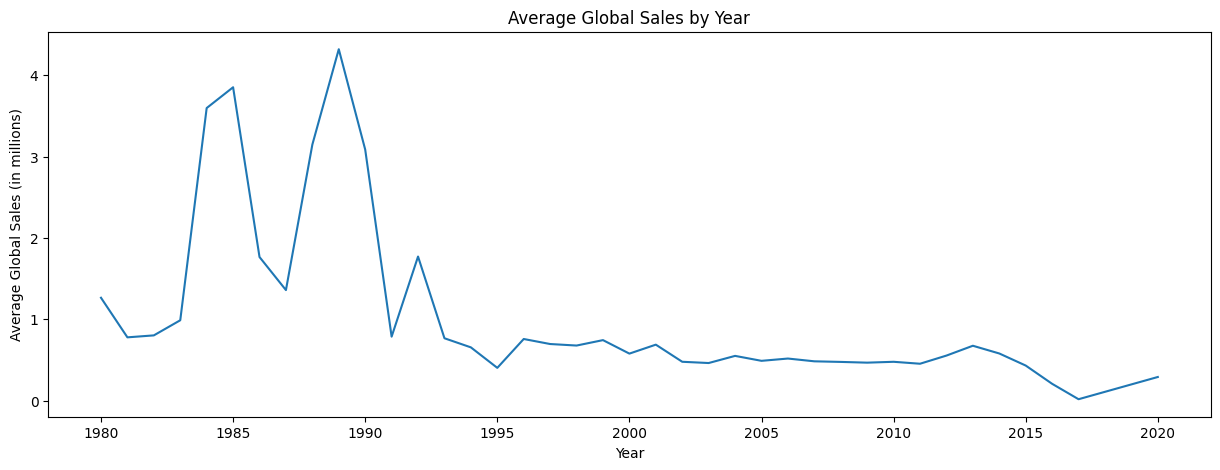

In [54]:
# How have global_Sales evolved across different years? Are there any trends or patterns in the sales data over time?
global_sales_by_year=df.groupby('Year')['Global_Sales'].mean().sort_index()
global_sales_by_year.plot(kind='line',figsize=(15,5))
plt.title("Average Global Sales by Year")
plt.xlabel("Year")
plt.ylabel("Average Global Sales (in millions)")
plt.show()

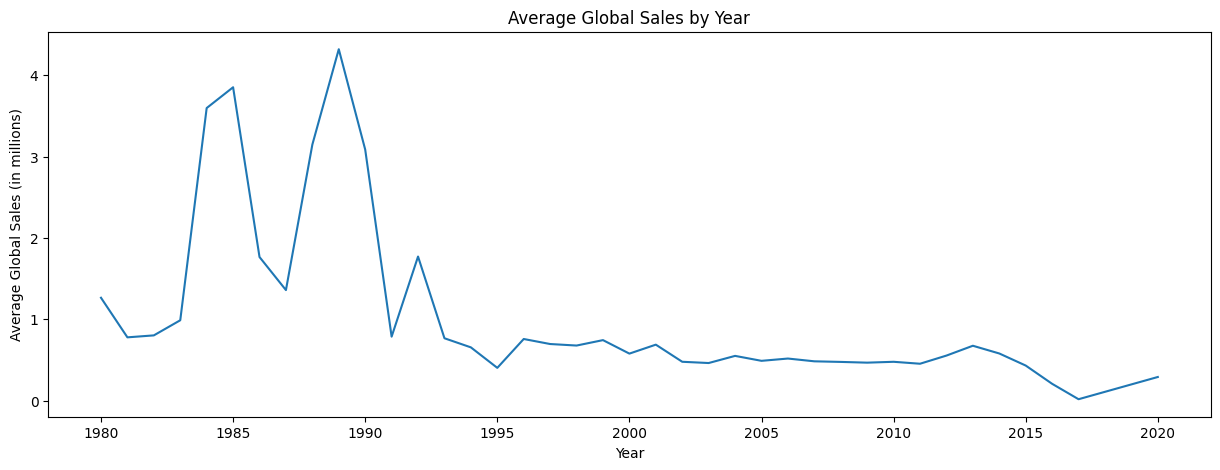

In [40]:
# Are newer games selling more or less compared to older games?
average_sales_per_year=df.groupby('Year')['Global_Sales'].mean().sort_index()
average_sales_per_year.plot(kind='line',figsize=(15,5))
plt.title("Average Global Sales by Year")
plt.xlabel("Year")
plt.ylabel("Average Global Sales (in millions)")
plt.show()

In [41]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

In [43]:
df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)

Year
2007    711.21
2008    678.90
2009    667.30
2010    600.45
2006    521.04
2011    515.99
2005    459.94
2004    419.31
2002    395.52
2013    368.11
2012    363.54
2003    357.85
2014    337.05
2001    331.47
2015    264.44
1998    256.47
1999    251.27
2000    201.56
1997    200.98
1996    199.15
1995     88.11
1994     79.17
1992     76.16
1989     73.45
2016     70.93
1985     53.94
1984     50.36
1990     49.39
1988     47.22
1993     45.98
1986     37.07
1981     35.77
1991     32.23
1982     28.86
1987     21.74
1983     16.79
1980     11.38
2020      0.29
2017      0.05
Name: Global_Sales, dtype: float64

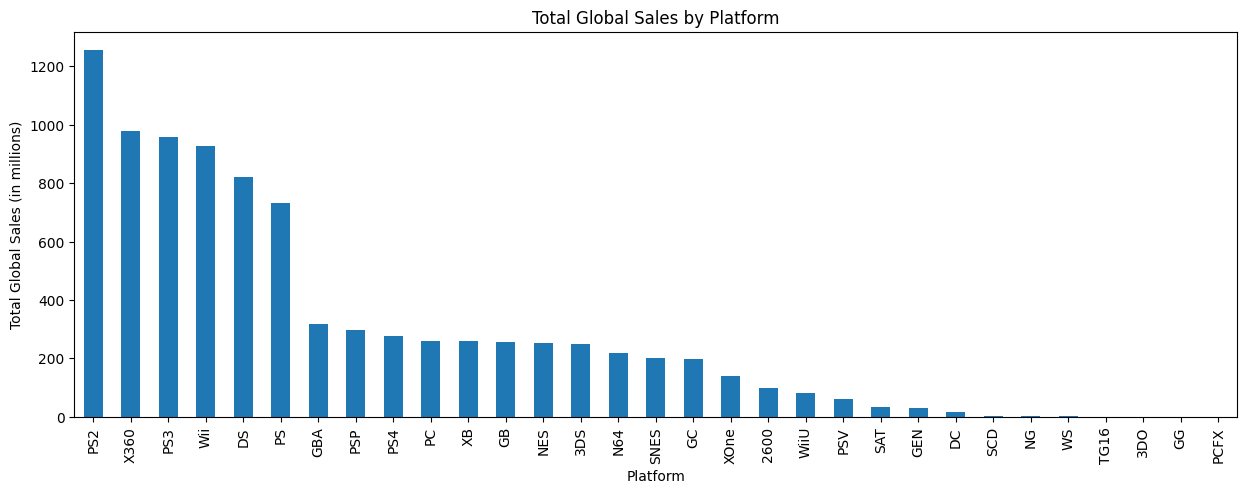

In [44]:
# Which platform has the highest total global sales?
platform_sales=df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar',figsize=(15,5))
plt.title("Total Global Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Global Sales (in millions)")
plt.show()

In [45]:
df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)


Platform
GB      2.606633
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
X360    0.774672
2600    0.729925
PS3     0.720722
Wii     0.699404
N64     0.686144
XOne    0.662254
PS      0.610920
PS2     0.581046
WiiU    0.572448
3DS     0.486169
GBA     0.387470
DS      0.380254
GC      0.358561
XB      0.313422
SCD     0.311667
DC      0.307115
PC      0.269604
PSP     0.244254
WS      0.236667
SAT     0.194162
PSV     0.149952
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64

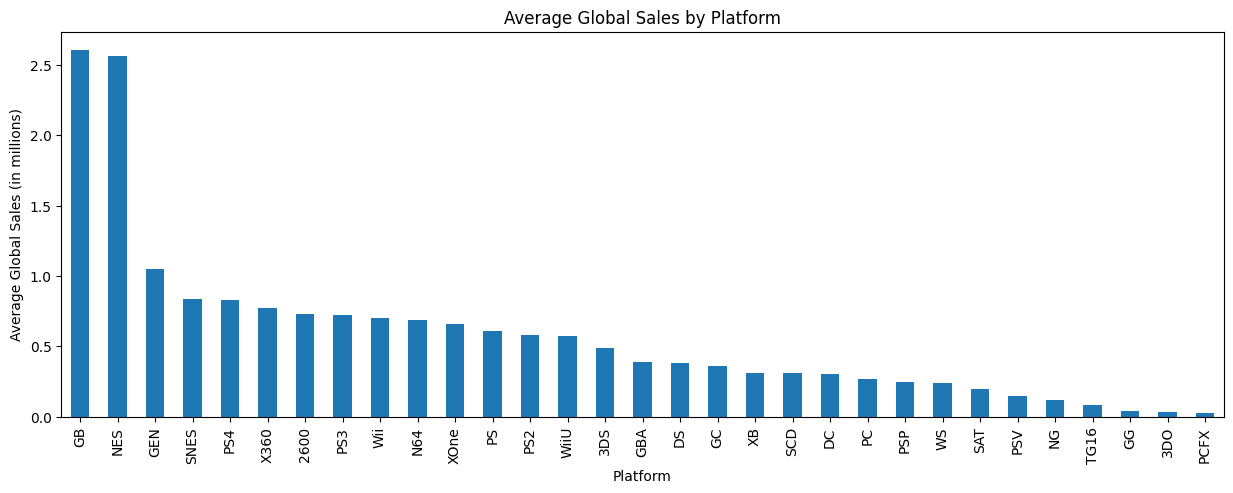

In [46]:
# Which platform has the highest total global sales?
average_platform_sales=df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
average_platform_sales.plot(kind='bar',figsize=(15,5))
plt.title("Average Global Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Global Sales (in millions)")
plt.show()

In [47]:
df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

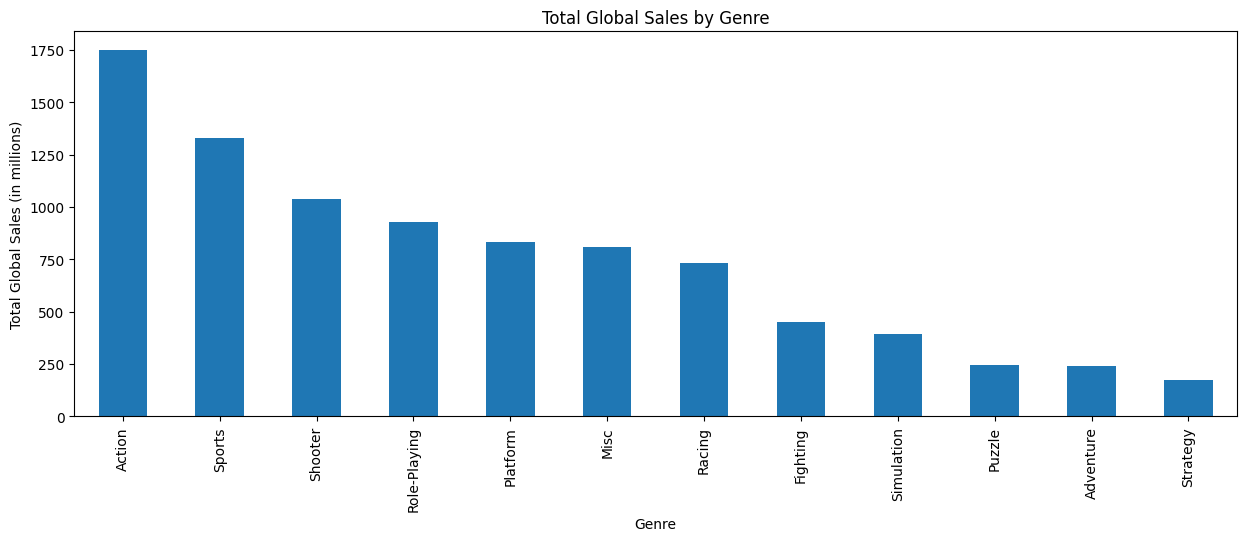

In [48]:
genre_sale=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sale.plot(kind='bar',figsize=(15,5))
plt.title("Total Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Global Sales (in millions)")
plt.show()

In [49]:
df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)


Genre
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: Global_Sales, dtype: float64

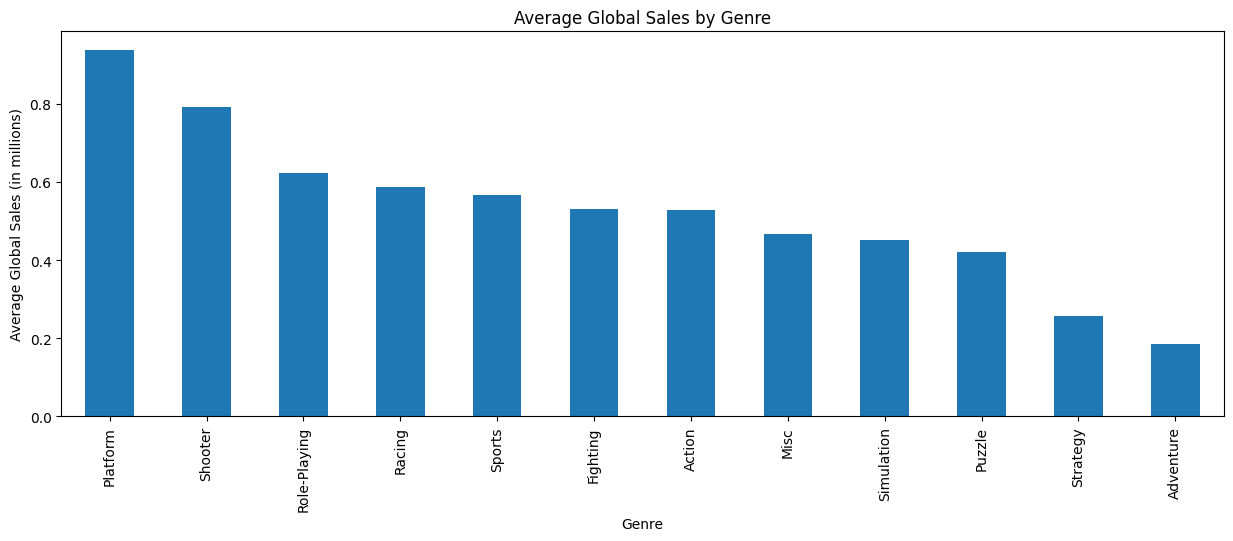

In [50]:
average_genre_sales=df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
average_genre_sales.plot(kind='bar',figsize=(15,5))
plt.title("Average Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Global Sales (in millions)")
plt.show()

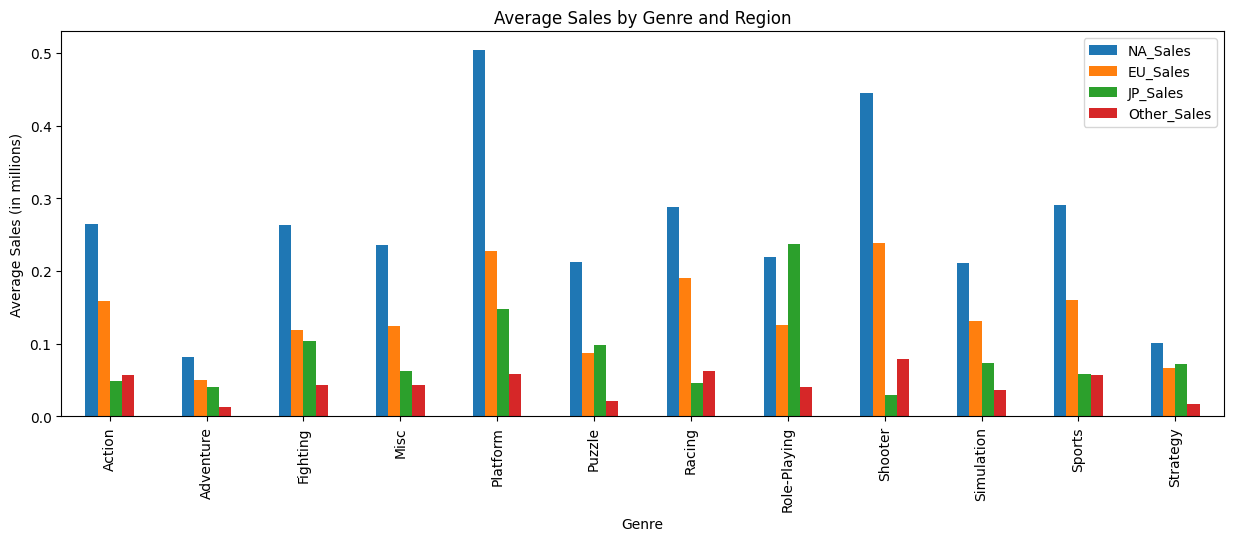

In [51]:
# Do some genres perform consistently well across all regions
genre_region_sales=df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
genre_region_sales.plot(kind='bar',figsize=(15,5))
plt.title("Average Sales by Genre and Region")
plt.xlabel("Genre")
plt.ylabel("Average Sales (in millions)")
plt.show()

In [52]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)


Publisher
Nintendo                       1786.56
Electronic Arts                1125.20
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
                                ...   
Genterprise                       0.01
Boost On                          0.01
Commseed                          0.01
Ascaron Entertainment             0.01
UIG Entertainment                 0.01
Name: Global_Sales, Length: 578, dtype: float64

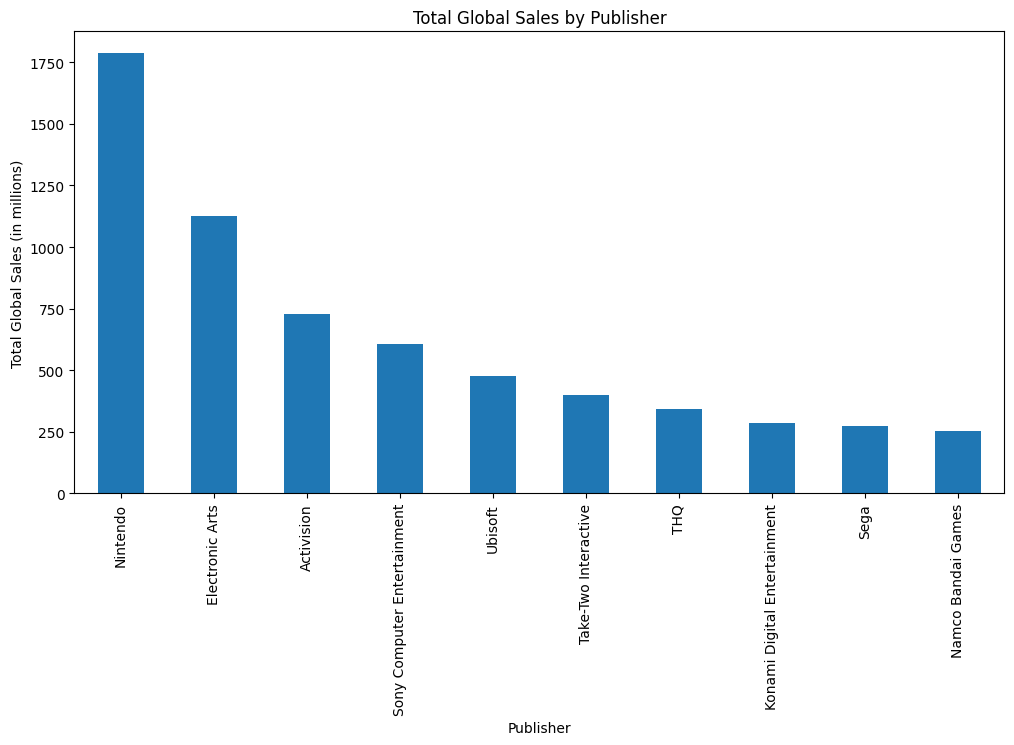

In [58]:
# which publisher has the highest total global sales?
publisher_sales=df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar',figsize=(12,6))
plt.title("Total Global Sales by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Total Global Sales (in millions)")
plt.show()


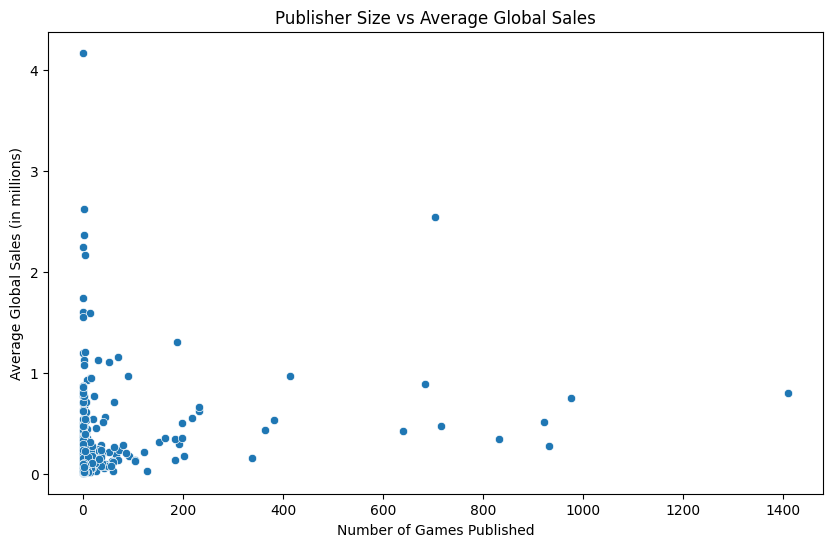

In [59]:
# Is publisher size correlated with higher sales ?
publisher_game_counts=df['Publisher'].value_counts()
publisher_avg_sales=df.groupby('Publisher')['Global_Sales'].mean()
publisher_size_sales=pd.DataFrame({
    'Game_Count': publisher_game_counts,
    'Average_Sales': publisher_avg_sales
}).dropna()
plt.figure(figsize=(10,6))
sns.scatterplot(data=publisher_size_sales,x='Game_Count',y='Average_Sales')
plt.title("Publisher Size vs Average Global Sales")
plt.xlabel("Number of Games Published")
plt.ylabel("Average Global Sales (in millions)")
plt.show()

In [60]:
publisher_size_sales

,Game_Count,Average_Sales
Publisher,,
10TACLE Studios,3,0.036667
1C Company,3,0.033333
20th Century Fox Video Games,5,0.388000
2D Boy,1,0.040000
3DO,36,0.281111
...,...,...
id Software,1,0.030000
imageepoch Inc.,2,0.020000
inXile Entertainment,1,0.100000


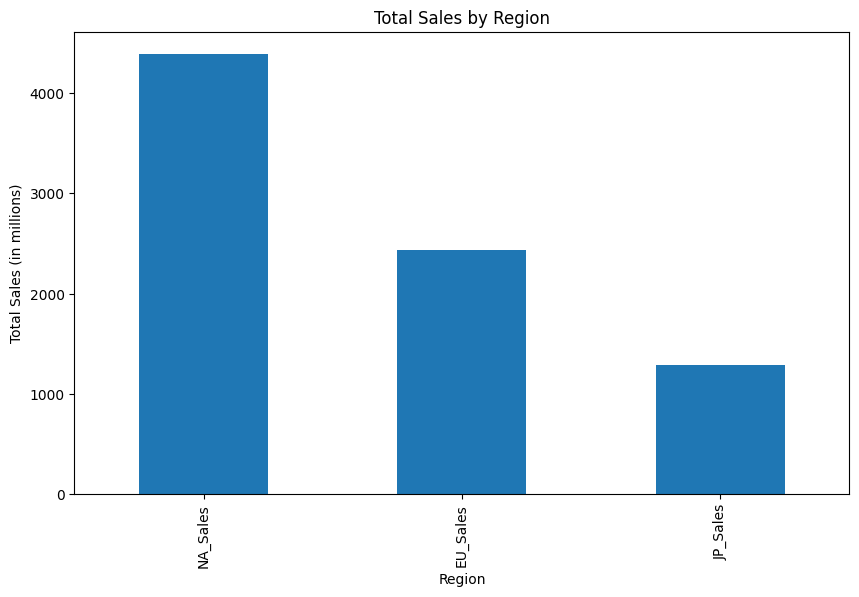

In [62]:
# How do sales patterns differ across North America, Europe, Japan, and other regions? Are there any regional preferences for certain genres or platforms?
region_sales=df[['NA_Sales','EU_Sales','JP_Sales']].sum()
region_sales.plot(kind='bar',figsize=(10,6))
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (in millions)")
plt.show()

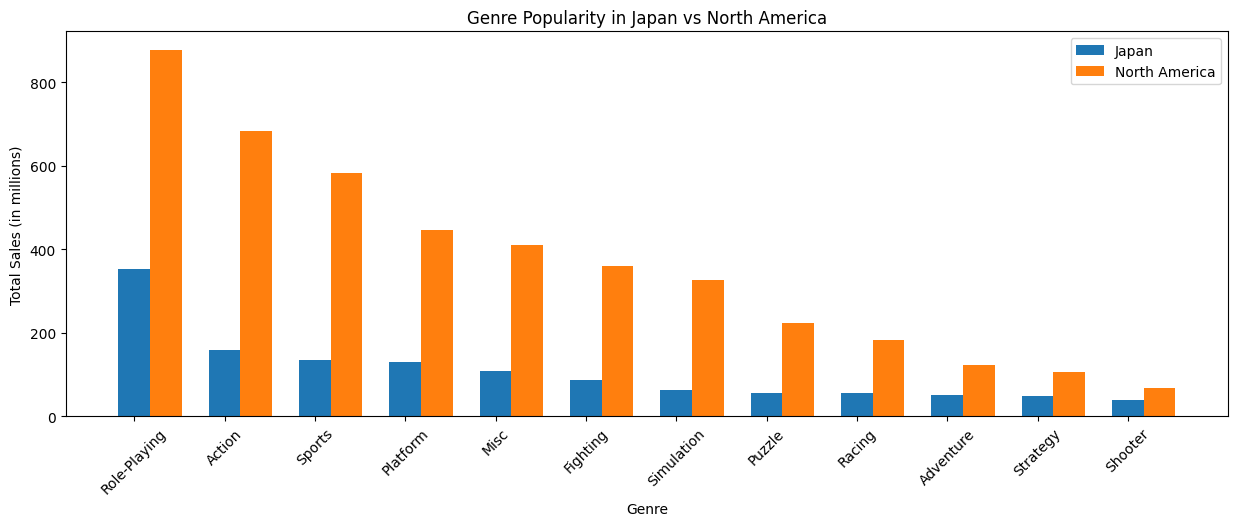

In [65]:
# which geners are more popular in japan compared to North America.
japan_popular_genres=df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
na_popular_genres=df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
width=0.35
x=np.arange(len(japan_popular_genres.index))
plt.bar(x-width/2,japan_popular_genres.values,width=width,label='Japan')
plt.bar(x+width/2,na_popular_genres.values,width=width,label='North America')
plt.xticks(x-width/2,japan_popular_genres.index,rotation=45)
plt.title("Genre Popularity in Japan vs North America")
plt.xlabel("Genre")
plt.ylabel("Total Sales (in millions)")
plt.legend()
plt.show()

In [66]:
# Which platforms perform well globally but poorly in Japan?
platform_global_sales = df.groupby('Platform')['Global_Sales'].sum()
platform_japan_sales = df.groupby('Platform')['JP_Sales'].sum()
platform_performance = pd.DataFrame({
    'Global_Sales': platform_global_sales,
    'JP_Sales': platform_japan_sales
})
platform_performance['JP_to_Global_Ratio'] = platform_performance['JP_Sales'] / platform_performance['Global_Sales']
platform_performance = platform_performance.sort_values(by='JP_to_Global_Ratio')
platform_performance


,Global_Sales,JP_Sales,JP_to_Global_Ratio
Platform,,,
2600,97.08,0.00,0.000000
PC,258.82,0.17,0.000657
XOne,141.06,0.34,0.002410
XB,258.26,1.38,0.005343
X360,979.96,12.43,0.012684
PS4,278.10,14.30,0.051420
Wii,926.71,69.35,0.074835
PS3,957.84,79.99,0.083511
GEN,28.36,2.67,0.094147
